<a href="https://colab.research.google.com/github/patrick-3008/Object-Recognition-in-Images/blob/main/CIFAR_10_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset

In [1]:
!pip install kaggle py7zr

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# daatset api
!kaggle competitions download -c cifar-10

100% 714M/715M [00:04<00:00, 262MB/s]
100% 715M/715M [00:04<00:00, 160MB/s]


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [10]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# Data Preprocessing

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
filenames = os.listdir('/content/train')
print(type(filenames))
print(len(filenames))

<class 'list'>
50000


In [18]:
print(filenames[0:5]) # first 5 files
print(filenames[-5:]) # last 5 files

['11119.png', '17595.png', '12894.png', '14067.png', '11307.png']
['14397.png', '42336.png', '40528.png', '33496.png', '49994.png']


In [19]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [20]:
labels_df.shape

(50000, 2)

In [21]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
labels_df['label'].value_counts() # the classes

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [24]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [25]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


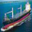

In [27]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/796.png')
cv2_imshow(img)

In [28]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [29]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [30]:
print(type(data))
print(len(data))
print(data[0].shape)
print(data[0])

<class 'list'>
50000
(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [31]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [32]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# Training

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train_scaled

array([[[[0.99607843, 1.        , 0.97647059],
         [0.98431373, 0.98431373, 0.96470588],
         [0.98823529, 0.98823529, 0.97254902],
         ...,
         [0.98039216, 0.98431373, 0.96470588],
         [0.98039216, 0.98431373, 0.95686275],
         [0.97647059, 0.98039216, 0.9372549 ]],

        [[1.        , 1.        , 0.98823529],
         [0.99607843, 1.        , 0.97647059],
         [1.        , 1.        , 0.98431373],
         ...,
         [1.        , 1.        , 0.98431373],
         [1.        , 1.        , 0.98039216],
         [0.99215686, 0.99607843, 0.96078431]],

        [[1.        , 1.        , 0.98431373],
         [0.99215686, 0.99607843, 0.97254902],
         [0.99607843, 0.99607843, 0.97647059],
         ...,
         [1.        , 1.        , 0.98431373],
         [0.99607843, 1.        , 0.98039216],
         [0.98823529, 0.99215686, 0.96470588]],

        ...,

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843]